# Analyzing Covid-19 Data: Norway


### What is Covid-19

COVID-19 is a respiratory disease caused by SARS-CoV-2, a coronavirus discovered in 2019. The virus spreads mainly from person to person through respiratory droplets and small particles produced when an infected person coughs, sneezes, or talks. The virus spreads readily in crowded or poorly ventilated indoor settings. Illness can range from mild to severe, though not everyone infected with the virus develops symptoms. Adults 65 years and older and people of any age with underlying medical conditions are at higher risk for severe illness.


### Authors

Dawson Calvin and John Lohr

## Data Source

The data used below was downloaded from the [European Centre for Disease Prevention and Control](https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide)


In [3]:
%matplotlib inline
import pandas
!pip install xlrd

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 4.3 MB/s eta 0:00:00


## Norway Covid-19 Data

In [5]:
df = pandas.read_excel('s3://calvin-241-python-s3/covid_data.xls')
norway_data=df.loc[df['countriesAndTerritories']=='Norway']
norway_data[:]

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
42617,14/12/2020,14,12,2020,0,0,Norway,NO,NOR,5328212.0,Europe,99.001316
42618,13/12/2020,13,12,2020,0,0,Norway,NO,NOR,5328212.0,Europe,99.001316
42619,2020-12-12 00:00:00,12,12,2020,498,5,Norway,NO,NOR,5328212.0,Europe,99.001316
42620,2020-11-12 00:00:00,11,12,2020,362,21,Norway,NO,NOR,5328212.0,Europe,98.663492
42621,2020-10-12 00:00:00,10,12,2020,459,0,Norway,NO,NOR,5328212.0,Europe,102.248184
...,...,...,...,...,...,...,...,...,...,...,...,...
42962,2020-04-01 00:00:00,4,1,2020,0,0,Norway,NO,NOR,5328212.0,Europe,NaN
42963,2020-03-01 00:00:00,3,1,2020,0,0,Norway,NO,NOR,5328212.0,Europe,NaN
42964,2020-02-01 00:00:00,2,1,2020,0,0,Norway,NO,NOR,5328212.0,Europe,NaN
42965,2020-01-01 00:00:00,1,1,2020,0,0,Norway,NO,NOR,5328212.0,Europe,NaN


## Question 1: Total Number of Cases in Norway

In [6]:
norway_data.sum()['cases']

/tmp/ipykernel_9432/249329646.py:1: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  norway_data.sum()['cases']


40022

### Explanation of Calculation

In this line of code, we described the total number of Covid-19 cases in Norway at the end of 2020. It totals the number of recorded cases from the "cases" column in the data set.

 ## Question 2: What Month Had The Highest Number of Covid-19 Cases in Norway

/tmp/ipykernel_9432/135974414.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  norway_cases=norway_data.groupby('month').sum()['cases']


<AxesSubplot: xlabel='month'>

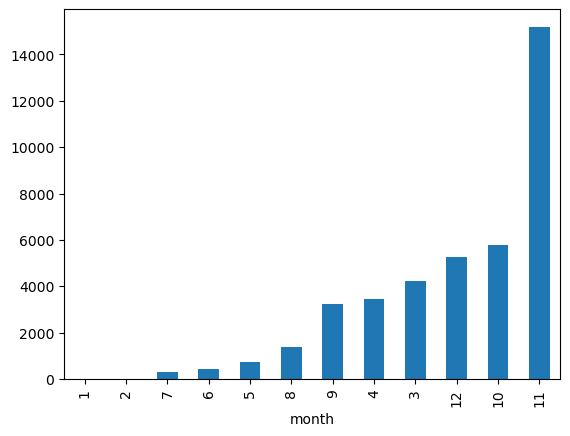

In [12]:
norway_cases=norway_data.groupby('month').sum()['cases']
norway_cases.nsmallest(12).plot.bar()

### Explanation of Calculations

We used a bar chart to show which month had the highest number of Covid-19 cases. We ordered them from least to most number of cases by month. The y-axis represents the number of Covid-19 cases and the x-axis represents each months of 2020 from January to December.

### Interpretation of Visualization

There were zero reported Covid-19 cases until March of 2020 with the number of cases progressively increasing as the year went on. The highest number of cases recorded in 2020 occured during November with over 14,000 cases. There was a dip in Covid-19 cases after March and started to rise again in July.

## Question 3: How Many Deaths Were There in Comparison To The Number of Covid-19 Cases Per Month In 2020

<AxesSubplot: xlabel='cases', ylabel='deaths'>

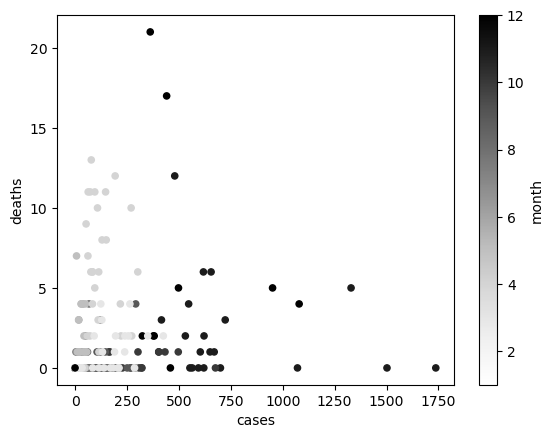

In [15]:
norway_data.plot.scatter(x='cases', y='deaths', c='month')

### Explanation of Calculations

This line of code represents the number of deaths compared to the month in which the cases were reported during 2020. The 
y-axis shows the amount of deaths and the x-axis represents the number of Covid-19 cases. On the far right, the months from January to December 2020 is recorded and the lighter the dot, the earlier the month in 2020 and the darker the dot, the later the month in 2020.

### Interpretation of Visualization

The scatter plot shows that the earlier the month in 2020 that you contracted Covid-19, you were significantly more likely to die from it. The later the months, the number of cases increased as 2020 progressed, but the deaths were relatively low. There were 2 outliers from the months of October to December that recorded more than 15 deaths. The mean deaths was less than 5 per month in comparison to the amount of cases which had a mean of 350 per month. We concluded that the number of deaths in the early months of 2020 can be attributed to the lack of a standardized treatment and knowledge of Covid-19. The first Covid-19 vaccine was not approved until Febuary of 2021.

[FDA Approves First COVID-19 Vaccine](https://www.fda.gov/news-events/press-announcements/fda-approves-first-covid-19-vaccine)

## Limitations

The European Centre for Disease Prevention and Control only reported documented cases of Covid-19 at the national level. There were also plenty of Covid-19 cases that were attributed to other illnesses at the beginning of 2020 that could have skewed the data in a more negative way. There were also a number of people who were asymptomatic and did not get tested or report having Covid-19 which could have caused a significant gap in the reported data.

### Conclusion

In conclusion, when analyzing the Covid-19 data from Norway, it is seen that the amount of cases were significantly lower in Norway in comparison to other European countries meaning that Norway was much more successful when dealing with Covid-19. The number of cases were significantly higher in the later months of 2020, but the number of deaths were higher in the earlier months which is due to the fact that Covid-19 was a new issue and there was no standardized treatment plan. When treatment plans were introduced in 2021, it is likely that the number of cases and deaths are going to decrease. 